# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import itertools
from collections import deque
import matplotlib.gridspec as gridspec

# Importing the Dataset

In [2]:
df = pd.read_csv('Postures.csv')
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


# EDA

We can see that the first row (0th row) has all its values as 0, so there will be no issues removing this row as it is not giving any intuition.

In [3]:
df.drop(0, inplace=True)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?


#### We shall start by observing the attributes and then draw conclusions on how these features are behaving and impacting our target.

#### As we know that 36 out of the 38 features represent coordinates, a statistical summary is the need of the hour.

In [4]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906
std,1.421152,4.697754,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null object
Y3       78095 non-null object
Z3       78095 non-null object
X4       78095 non-null object
Y4       78095 non-null object
Z4       78095 non-null object
X5       78095 non-null object
Y5       78095 non-null object
Z5       78095 non-null object
X6       78095 non-null object
Y6       78095 non-null object
Z6       78095 non-null object
X7       78095 non-null object
Y7       78095 non-null object
Z7       78095 non-null object
X8       78095 non-null object
Y8       78095 non-null object
Z8       78095 n

#### No null values but it is clear we have numerous missing values, before proceeding lets handle them first.

#### We first convert the '?' to null values

In [6]:
df.replace('?',np.nan, inplace=True)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the percentage of missing data, this will give us an intuition of what we are actually dealing with.

In [7]:
for i in df.columns:
    a = df[i].isnull().sum()/len(df)*100
    print(i,'-',a.round(2),'%')

Class - 0.0 %
User - 0.0 %
X0 - 0.0 %
Y0 - 0.0 %
Z0 - 0.0 %
X1 - 0.0 %
Y1 - 0.0 %
Z1 - 0.0 %
X2 - 0.0 %
Y2 - 0.0 %
Z2 - 0.0 %
X3 - 0.88 %
Y3 - 0.88 %
Z3 - 0.88 %
X4 - 4.0 %
Y4 - 4.0 %
Z4 - 4.0 %
X5 - 16.68 %
Y5 - 16.68 %
Z5 - 16.68 %
X6 - 33.1 %
Y6 - 33.1 %
Z6 - 33.1 %
X7 - 50.13 %
Y7 - 50.13 %
Z7 - 50.13 %
X8 - 60.86 %
Y8 - 60.86 %
Z8 - 60.86 %
X9 - 69.31 %
Y9 - 69.31 %
Z9 - 69.31 %
X10 - 81.11 %
Y10 - 81.11 %
Z10 - 81.11 %
X11 - 99.96 %
Y11 - 99.96 %
Z11 - 99.96 %


Wow! Thats a whole lot of nulls, specially in the last few features. I guess this tells us a little about the markers placed. Before we conclude on how to deal with these nulls lets have a look and try to find intuitions from other features as well.

#### Lets start with our target.

In [8]:
df['Class'].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

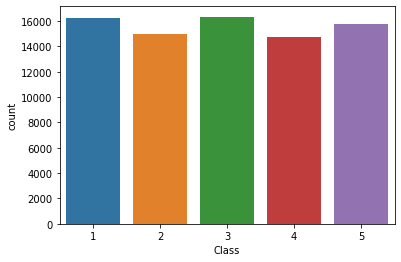

In [9]:
sns.countplot(df['Class'])
plt.show()

There is no imbalance in the classes. That surely is goodnews as imbalance can lead to biasness in the results.

In [10]:
df['User'].value_counts(sort=False)

0     9048
1     4717
2     4513
4      379
5     5105
6     4377
7      492
8     6811
9     3920
10    9573
11    8061
12    4865
13    8739
14    7495
Name: User, dtype: int64

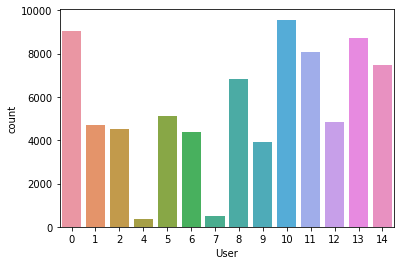

In [11]:
sns.countplot(df['User'])
plt.show()

#### There are 14 different users. We have user number 3 missing from between. Also user 4 and 7 have very less number of values so we will remove them and proceed as these two users have very less values and also our problem statement consists of 12 users only

In [12]:
df = df[df['User']!=4]
df = df[df['User']!=7]
df['User'].value_counts(sort=False)

0     9048
1     4717
2     4513
5     5105
6     4377
8     6811
9     3920
10    9573
11    8061
12    4865
13    8739
14    7495
Name: User, dtype: int64

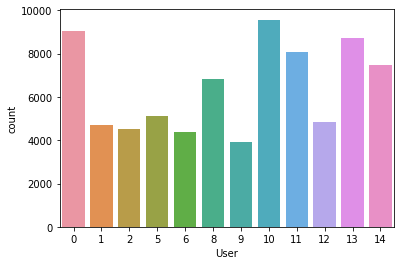

In [13]:
sns.countplot(df['User'])
plt.show()

#### Implementing with a basic median imputation for the null values treatment:

In [14]:
df1 = df.copy()

In [15]:
for i in df1.columns:
    df1[i].fillna(df1[i].median(), inplace=True)

In [16]:
for i in df1.columns:
    a = df1[i].isnull().sum()/len(df1)*100
    print(i,'-',a.round(2),'%')

Class - 0.0 %
User - 0.0 %
X0 - 0.0 %
Y0 - 0.0 %
Z0 - 0.0 %
X1 - 0.0 %
Y1 - 0.0 %
Z1 - 0.0 %
X2 - 0.0 %
Y2 - 0.0 %
Z2 - 0.0 %
X3 - 0.0 %
Y3 - 0.0 %
Z3 - 0.0 %
X4 - 0.0 %
Y4 - 0.0 %
Z4 - 0.0 %
X5 - 0.0 %
Y5 - 0.0 %
Z5 - 0.0 %
X6 - 0.0 %
Y6 - 0.0 %
Z6 - 0.0 %
X7 - 0.0 %
Y7 - 0.0 %
Z7 - 0.0 %
X8 - 0.0 %
Y8 - 0.0 %
Z8 - 0.0 %
X9 - 0.0 %
Y9 - 0.0 %
Z9 - 0.0 %
X10 - 0.0 %
Y10 - 0.0 %
Z10 - 0.0 %
X11 - 0.0 %
Y11 - 0.0 %
Z11 - 0.0 %


### Now we are done with handling null values, we can proceed further. To be on the safe side lets check the dataset again for any abnormalities so that we get a clean data for our algorithms.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77224 entries, 1 to 78095
Data columns (total 38 columns):
Class    77224 non-null int64
User     77224 non-null int64
X0       77224 non-null float64
Y0       77224 non-null float64
Z0       77224 non-null float64
X1       77224 non-null float64
Y1       77224 non-null float64
Z1       77224 non-null float64
X2       77224 non-null float64
Y2       77224 non-null float64
Z2       77224 non-null float64
X3       77224 non-null object
Y3       77224 non-null object
Z3       77224 non-null object
X4       77224 non-null object
Y4       77224 non-null object
Z4       77224 non-null object
X5       77224 non-null object
Y5       77224 non-null object
Z5       77224 non-null object
X6       77224 non-null object
Y6       77224 non-null object
Z6       77224 non-null object
X7       77224 non-null object
Y7       77224 non-null object
Z7       77224 non-null object
X8       77224 non-null object
Y8       77224 non-null object
Z8       77224 n

### We can see that there are some columns with object as their data type. So, the most probable case scenario would be the values in some of the features are input as string by mistake. We need to correct this:

In [18]:
for i in df1.columns.drop(['Class','User']):
    df1[i] = df1[i].astype(float)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77224 entries, 1 to 78095
Data columns (total 38 columns):
Class    77224 non-null int64
User     77224 non-null int64
X0       77224 non-null float64
Y0       77224 non-null float64
Z0       77224 non-null float64
X1       77224 non-null float64
Y1       77224 non-null float64
Z1       77224 non-null float64
X2       77224 non-null float64
Y2       77224 non-null float64
Z2       77224 non-null float64
X3       77224 non-null float64
Y3       77224 non-null float64
Z3       77224 non-null float64
X4       77224 non-null float64
Y4       77224 non-null float64
Z4       77224 non-null float64
X5       77224 non-null float64
Y5       77224 non-null float64
Z5       77224 non-null float64
X6       77224 non-null float64
Y6       77224 non-null float64
Z6       77224 non-null float64
X7       77224 non-null float64
Y7       77224 non-null float64
Z7       77224 non-null float64
X8       77224 non-null float64
Y8       77224 non-null float64

### Now as we have sorted this out we can make some plots and try to get some intuitions from the data.

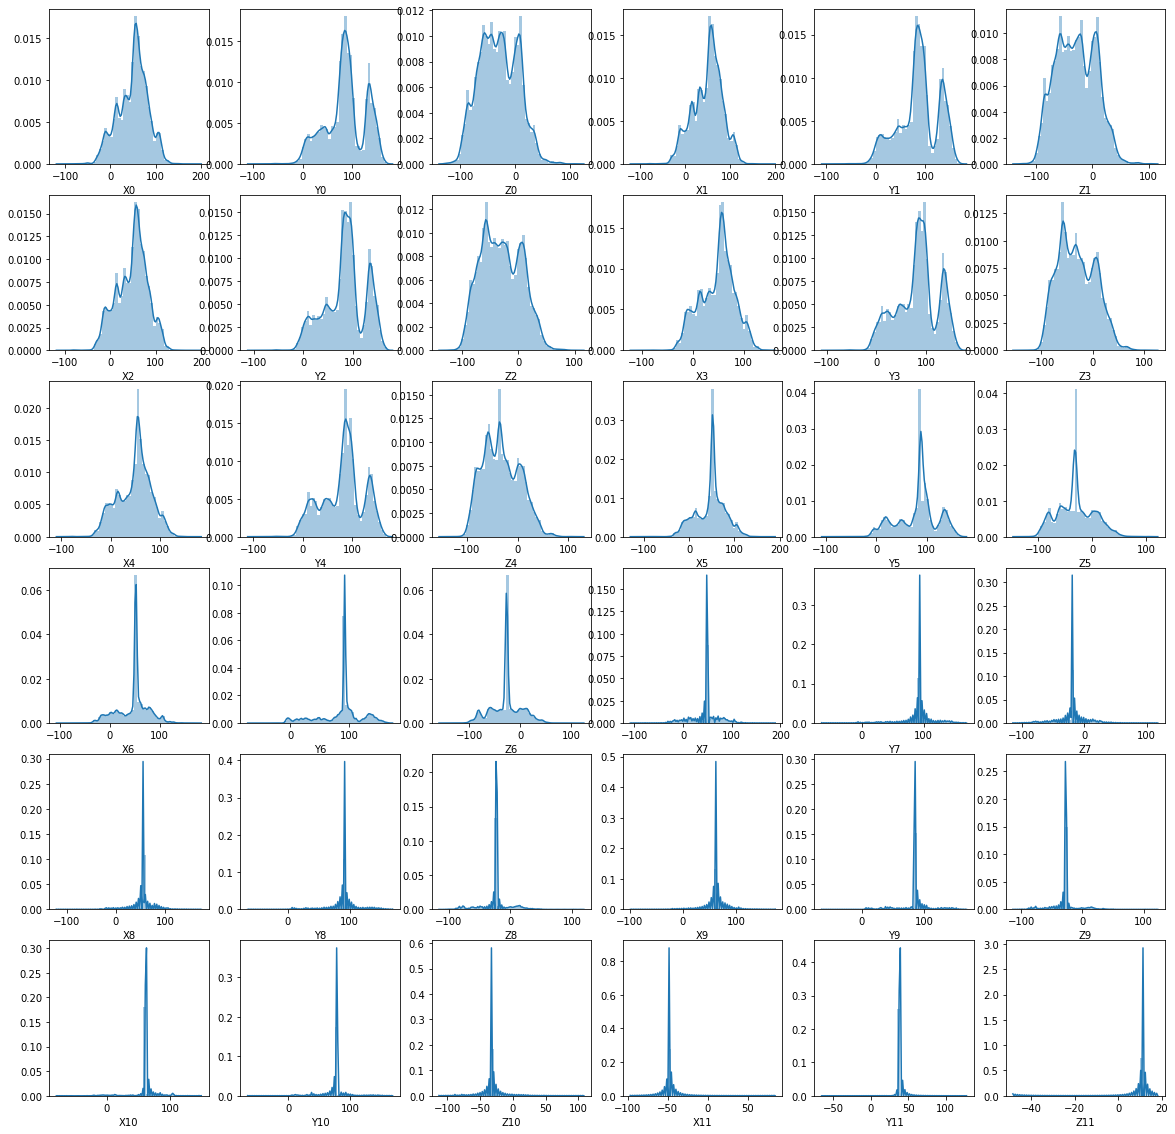

In [20]:
fig, axes = plt.subplots(6,6, figsize=(20,20))
axes = axes.flatten()

for i in range(len(df1.drop(['Class','User'], axis=1).columns)):
    sns.distplot(df1.iloc[:,i+2], ax=axes[i])
    
plt.show()

### Intuition:

There are a lot of features towards the second half of the dataset which are concentrated near one value, the reason for this is the imputation we had used. As these features had most of their data missing we had imputed values at their places resulting in a distribution concentrated near one value.

#### We can also recheck this result by scaling the data first.

### Lets give a look at the outliers also:

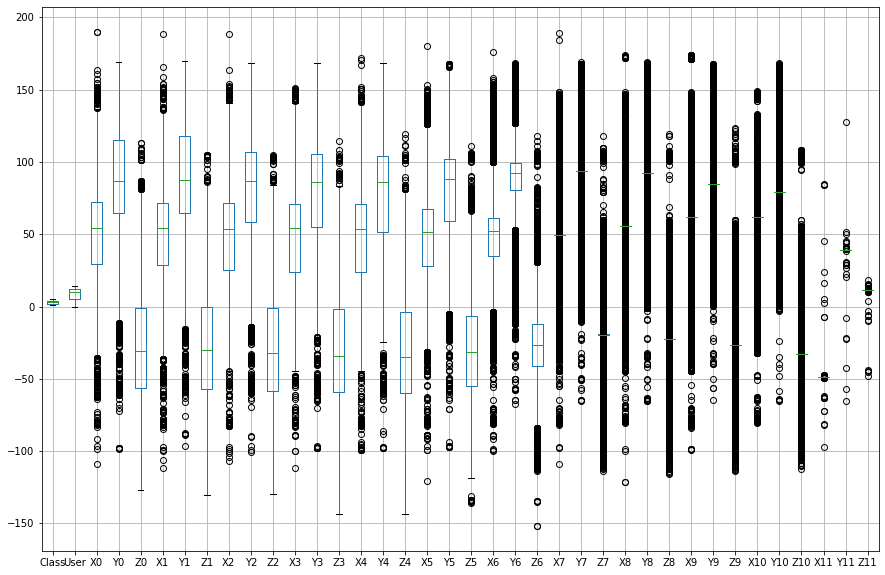

In [21]:
df1.boxplot(figsize=(15,10))
plt.show()

#### Astonishing!! The outliers are more seen than the data itself. In some of the features it is almost impossible to determine the Q1 and Q3 values.
We will deal with treatment of the outliers later anf if they are really hindering with the performance of the model.

### Heat Map

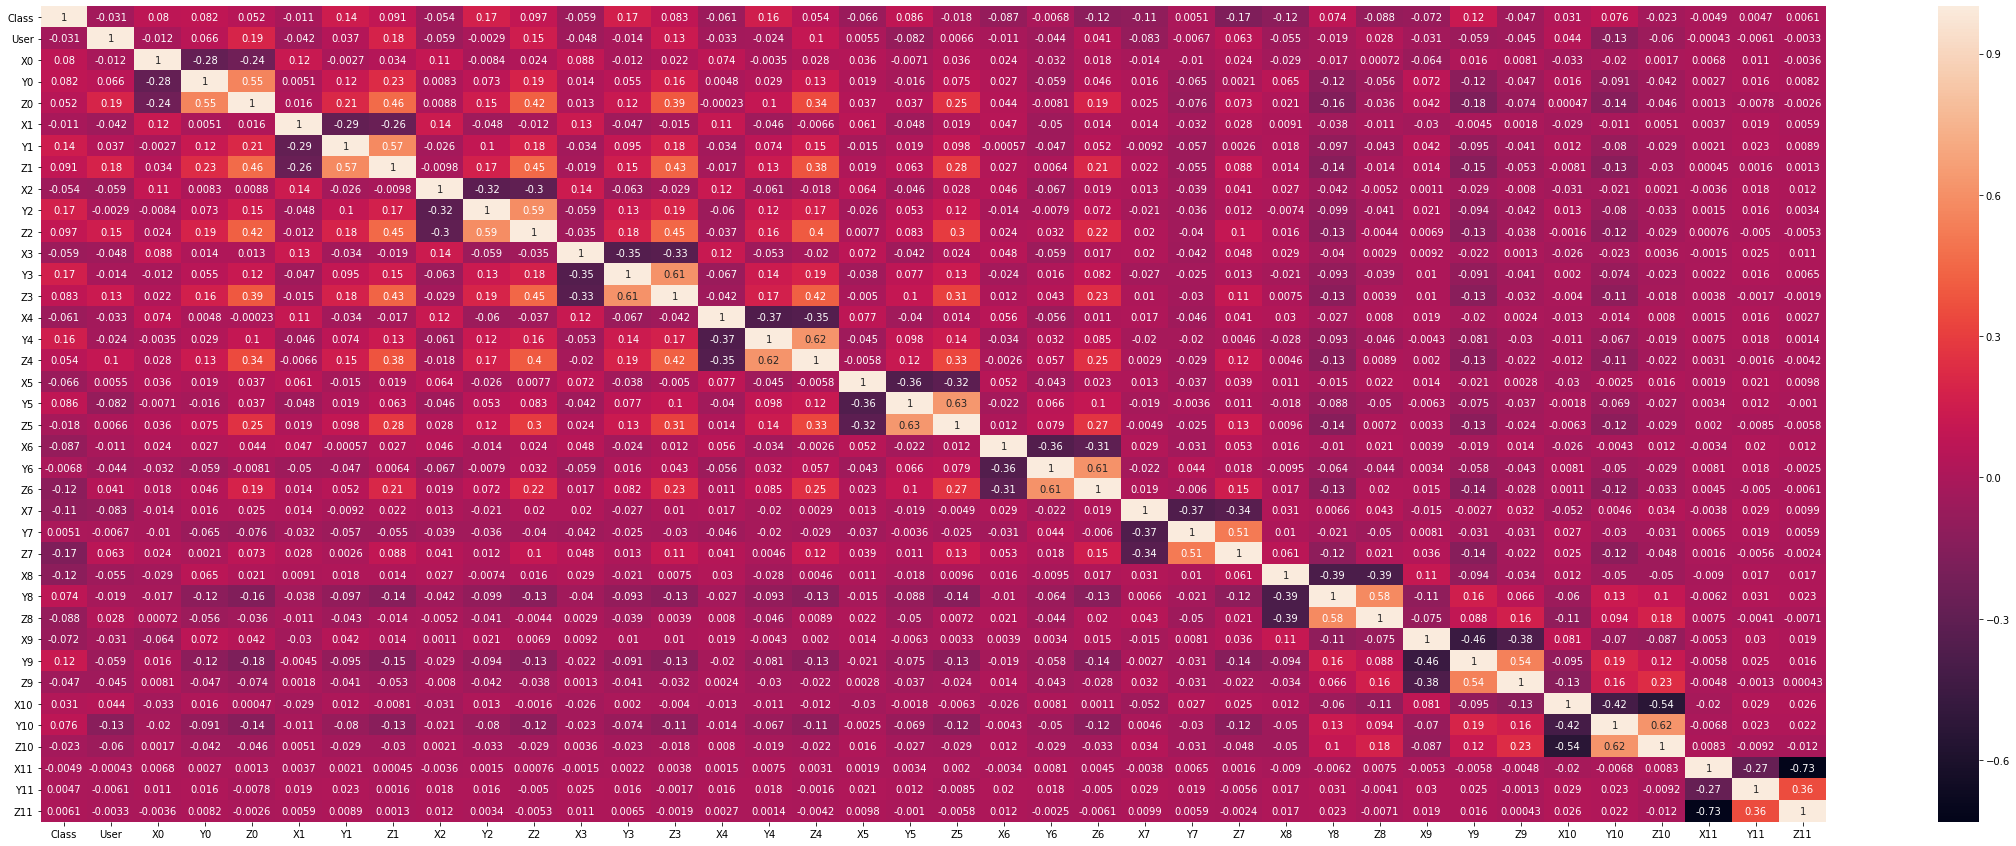

In [22]:
plt.figure(figsize=(40,15))
sns.heatmap(df1.corr(), annot=True)
plt.show()

#### The features X11 and Z10 are highly correlated, also X10 and Z10, a few more probably. In my opinion it was something inevitable due to the large number of nulls and the imputation done. 
#### Also it should be kept in mind that these are actually cordinates and movement of any two markers can exhibit similar pattern, even can overlap each other.

### We have cleaned a portion of the data as of now, we will check how our models perform and with due need clean the data further to see the changes in the result.

### Result Visualization:
#### In order to visualize the reults and to get proper intuitions from them we would use Mosaic plot for our dataset which is defined below:

In [23]:
def mosaic_plot(results):
    def split_list(x):
        return [a[i:i+x] for i in range(0, len(a), x)]
    
    a = []
    for i in range(5):
        for j in range(5):
            a.append(results[i][j])
    
    results = split_list(5)
    
    n_classes = 5
    class_lists = [range(1,n_classes+1)]*2
    mosaic_tuples = tuple(itertools.product(*class_lists))
    
    res_list = results[0]
    for i,j in enumerate(results):
        if i==0:
            pass
        else:
            tmp = deque(j)
            tmp.rotate(-i)
            res_list.extend(tmp)
    data = {t:res_list[i]+1 for i,t in (enumerate(mosaic_tuples))}

    fig, ax = plt.subplots(figsize=(4, 4))
    
    
    plt.rcParams.update({'font.size': 16})

    font_color = '#2c3e50'
    pallet = [
        'sandybrown', 
        'lightgreen', 
        'skyblue', 
        'lightslategray',
        'mediumpurple'
    ]
    colors = deque(pallet[:n_classes])
    all_colors = []
    for i in range(n_classes):
        if i > 0:
            colors.rotate(-1)
        all_colors.extend(colors)

    props = {(str(a), str(b)):{'color':all_colors[i]} for i,(a, b) in enumerate(mosaic_tuples)}

    labelizer = lambda k: ''

    
    p = mosaic(data, labelizer=labelizer, properties=props, ax=ax)

    title_font_dict = {
        'fontsize': 20,
        'color' : font_color,
    }
    axis_label_font_dict = {
        'fontsize': 16,
        'color' : font_color,
    }

    ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax.axes.yaxis.set_ticks([])
    ax.tick_params(axis='x', which='major', labelsize=14)

    ax.set_title('User')
    ax.set_xlabel('Observed Class')
    ax.set_ylabel('Predicted Class')

    legend_elements = [Patch(facecolor=all_colors[i], label='Class {}'.format(i+1)) for i in range(n_classes)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1,1.018))

    plt.tight_layout()
    plt.show()

#### In the above defined function the "results" refer to the confusion matrix.

### Trying Leave-One-User out split:
#### The problem statement itself had the requirement of using one user split instead of train test split,  makes sense as the users are the independent feature on which the class prediction will depend, so checking the result user wise will give more intuition rather than going on with train test split.

In [24]:
scores1 = []
scores2 = []
matrix = []

for i in df1['User'].unique():
    X_test = df1.drop('Class', axis=1)[df1['User'] == i]
    X_train = df1.drop('Class', axis=1)[df1['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df1['Class'][df1['User'] == i]
    y_train = df1['Class'][df1['User'] != i]
    
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    y_pred = log.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_matrix)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.4837533156498674
The f1 score for the User 0 is: 0.4624511232003161
[[1595    0  119  130   28]
 [ 130  780   94   47  450]
 [ 346   18  642  780   65]
 [1073    2   53  123  530]
 [ 514  207    2   83 1237]]


The accuracy score for the User 1 is: 0.56624973500106
The f1 score for the User 1 is: 0.570866602110476
[[1306    0    0    1    0]
 [   0  458    6   10  322]
 [  60   14  516  366   12]
 [   0   82    2  205  272]
 [  76   14  280  529  186]]


The accuracy score for the User 2 is: 0.558386882339907
The f1 score for the User 2 is: 0.4640899523570595
[[1076    0   27   95    0]
 [   0  793    3    7    5]
 [   0    0   51  670    0]
 [   0    0   78  599    0]
 [  29  774   80  225    1]]


The accuracy score for the User 5 is: 0.5245837414299707
The f1 score for the User 5 is: 0.478471566361719
[[   0   96    0    0  724]
 [   0 1143    0    0    0]
 [   3    0  733   53  137]
 [   8    2  157  342  524]
 [   5  696    0   22  460]]


T

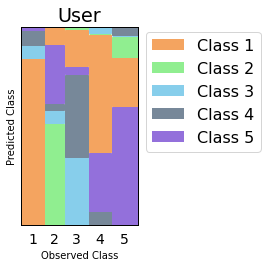

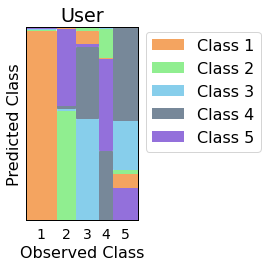

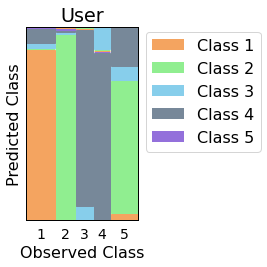

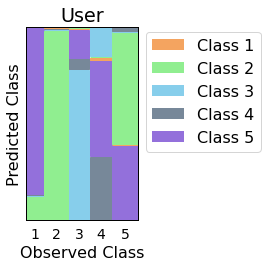

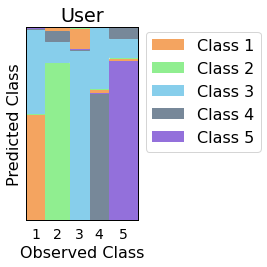

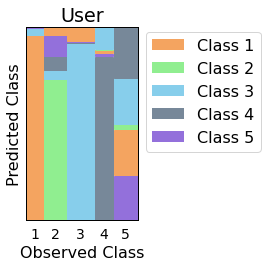

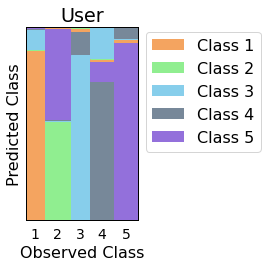

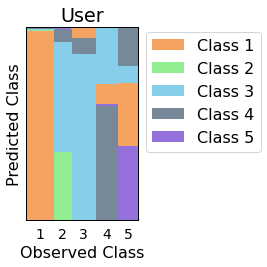

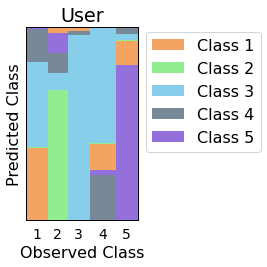

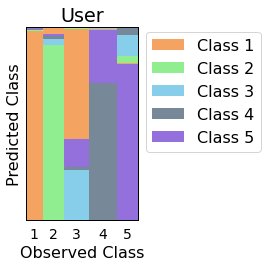

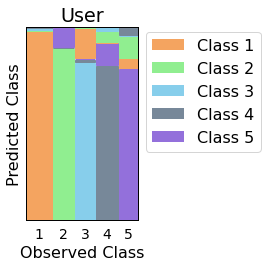

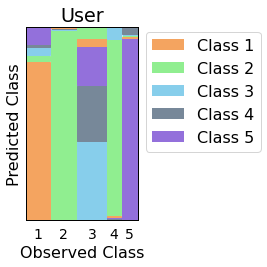

In [25]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [26]:
LRA = np.mean(scores1)
LRF = np.mean(scores2)
print(LRA)
print(LRF)

0.6649818248819156
0.6435747299399242


In [51]:
matrix

[array([[1595,    0,  119,  130,   28],
        [ 130,  780,   94,   47,  450],
        [ 346,   18,  642,  780,   65],
        [1073,    2,   53,  123,  530],
        [ 514,  207,    2,   83, 1237]], dtype=int64),
 array([[1306,    0,    0,    1,    0],
        [   0,  458,    6,   10,  322],
        [  60,   14,  516,  366,   12],
        [   0,   82,    2,  205,  272],
        [  76,   14,  280,  529,  186]], dtype=int64),
 array([[1076,    0,   27,   95,    0],
        [   0,  793,    3,    7,    5],
        [   0,    0,   51,  670,    0],
        [   0,    0,   78,  599,    0],
        [  29,  774,   80,  225,    1]], dtype=int64),
 array([[   0,   96,    0,    0,  724],
        [   0, 1143,    0,    0,    0],
        [   3,    0,  733,   53,  137],
        [   8,    2,  157,  342,  524],
        [   5,  696,    0,   22,  460]], dtype=int64),
 array([[409,   0, 329,   0,   0],
        [ 10, 799, 104,  49,   0],
        [ 80,   0, 699,   0,   0],
        [  9,   0, 237, 498,   0],


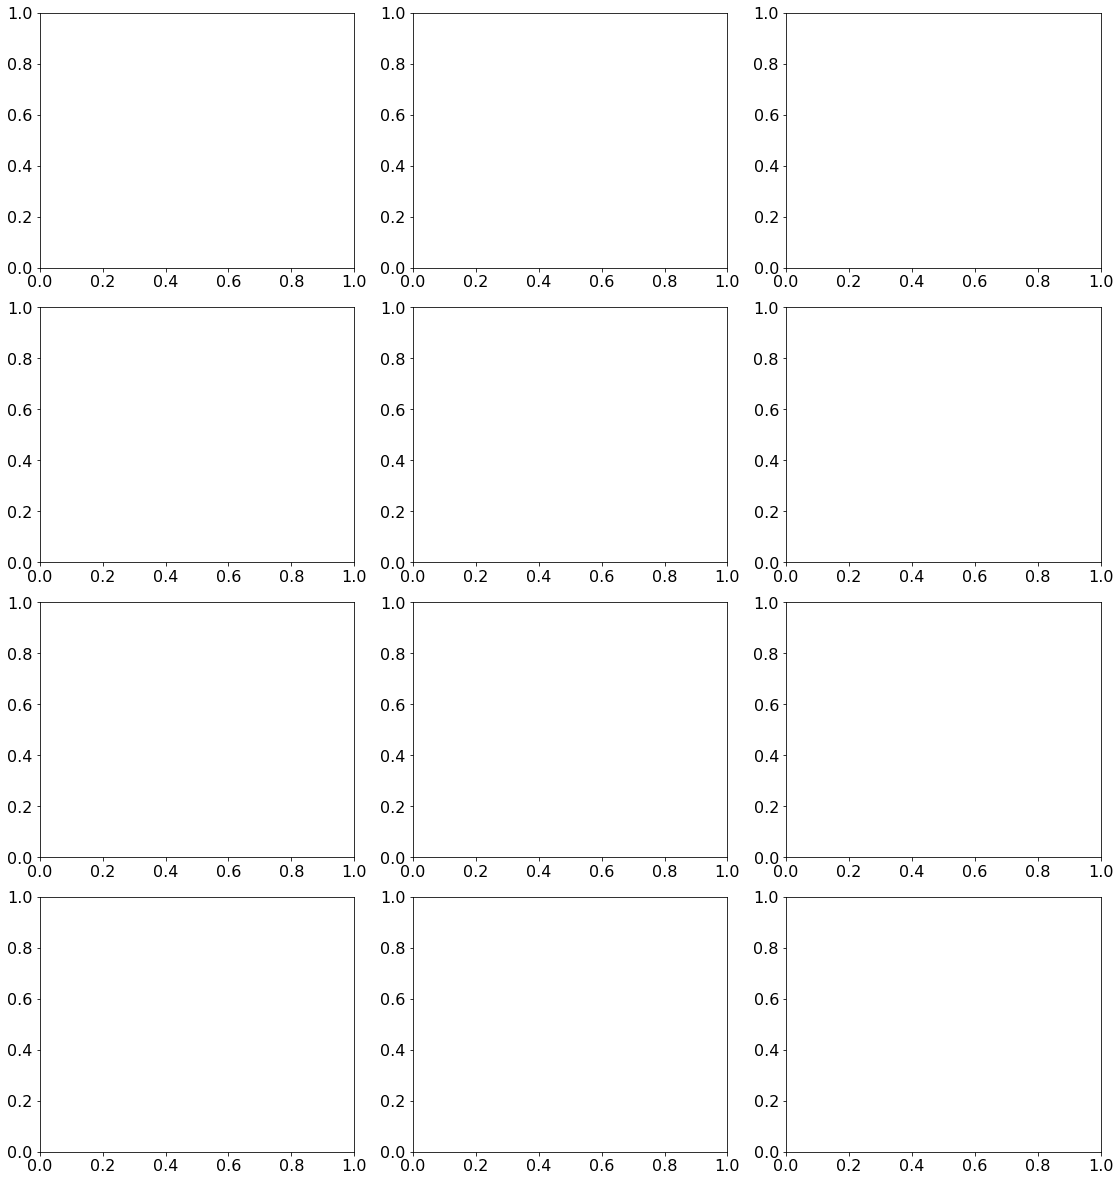

In [56]:
fig = plt.figure(figsize=(20,20), constrained_layout=True)
spec = fig.add_gridspec(ncols=4, nrows=5)

for row in range(1,5):
    for col in range(1,4):
        ax = fig.add_subplot(spec[row, col])
        ax.plot()

#### Random Forest

In [136]:
scores1 = []
scores2 = []
matrix = []

for i in df1['User'].unique():
    X_test = df1.drop('Class', axis=1)[df1['User'] == i]
    X_train = df1.drop('Class', axis=1)[df1['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df1['Class'][df1['User'] == i]
    y_train = df1['Class'][df1['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_matrix)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.8563218390804598
The f1 score for the User 0 is: 0.856511078291871
[[1556   54  259    3    0]
 [   0 1362    0    0  139]
 [  12   23 1736   75    5]
 [  86    2  414 1235   44]
 [   0   97   38   49 1859]]


The accuracy score for the User 1 is: 0.8679245283018868
The f1 score for the User 1 is: 0.8652670597180664
[[1307    0    0    0    0]
 [   0  592    0   19  185]
 [  23    0  844  101    0]
 [   0   34    3  287  237]
 [   0    0    5   16 1064]]


The accuracy score for the User 2 is: 0.7394194549080434
The f1 score for the User 2 is: 0.6743826568552214
[[1196    0    2    0    0]
 [   0  696    0    0  112]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  696    5  360   48]]


The accuracy score for the User 5 is: 0.455435847208619
The f1 score for the User 5 is: 0.37801239561355027
[[   0  367   77    3  373]
 [   0  630   20  467   26]
 [   0    0  922    3    1]
 [   0    0 1008   24    1]
 [   0  434    0    0  749]]

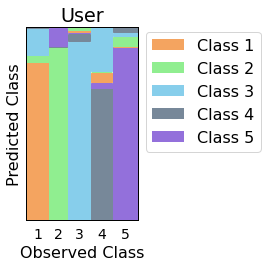

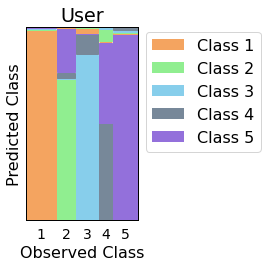

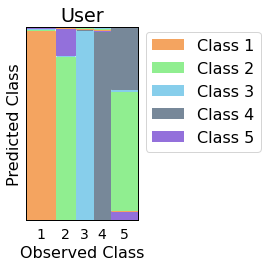

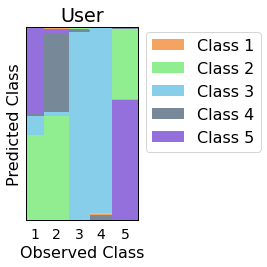

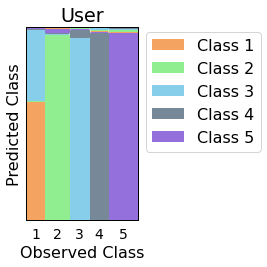

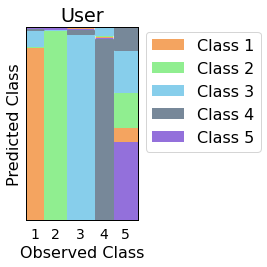

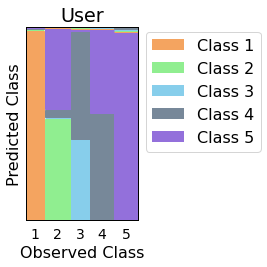

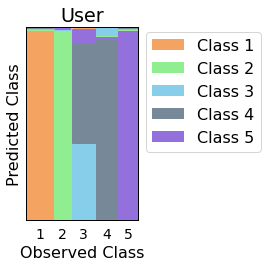

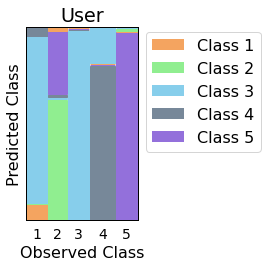

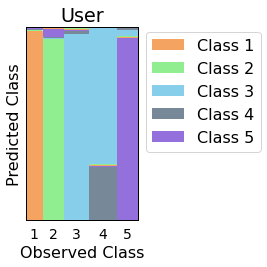

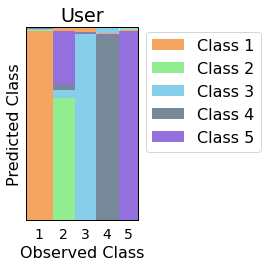

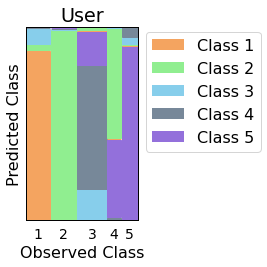

In [137]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [138]:
RFA = np.mean(scores1)
RFF = np.mean(scores2)
print(RFA)
print(RFF)

0.774088983468776
0.7507139842994776


#### Lets remove the variables x10, y10, z10, x11, y11 and z11 as they have more than 80% of their values Null.

In [139]:
df2 = df1.drop(['X10','Y10','Z10','X11','Y11','Z11'], axis=1)
df2.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517


In [140]:
scores1 = []
scores2 = []
matrix = []

for i in df2['User'].unique():
    X_test = df2.drop('Class', axis=1)[df2['User'] == i]
    X_train = df2.drop('Class', axis=1)[df2['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df2['Class'][df2['User'] == i]
    y_train = df2['Class'][df2['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.8537798408488063
The f1 score for the User 0 is: 0.853298396072525
[[1613   76  183    0    0]
 [   0 1217    0    0  284]
 [  12    6 1770   57    6]
 [  74    0  449 1239   19]
 [   0   65   31   61 1886]]


The accuracy score for the User 1 is: 0.8643205427178291
The f1 score for the User 1 is: 0.8603505578315869
[[1307    0    0    0    0]
 [   0  598    0   24  174]
 [  23    0  849   96    0]
 [   0   42    2  261  256]
 [   0    4    6   13 1062]]


The accuracy score for the User 2 is: 0.7287835142920452
The f1 score for the User 2 is: 0.6670853180615585
[[1195    0    3    0    0]
 [   0  654    0    0  154]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  720    6  340   43]]


The accuracy score for the User 5 is: 0.46248775710088147
The f1 score for the User 5 is: 0.38217143688484945
[[  0 378  93   7 342]
 [  0 772  19 339  13]
 [  0   0 921   5   0]
 [  0   0 977  56   0]
 [  0 571   0   0 612]]


The accuracy score f

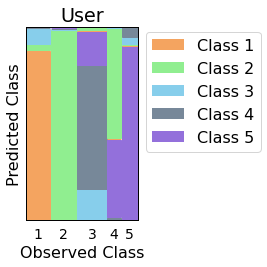

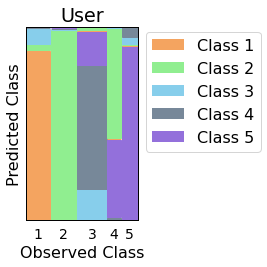

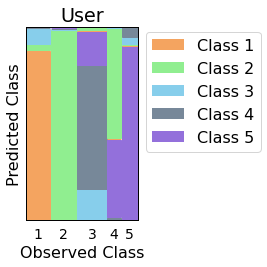

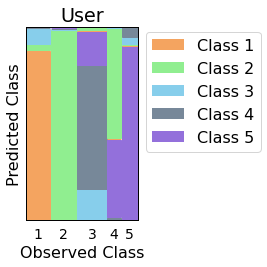

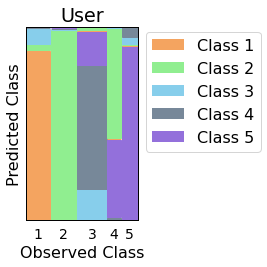

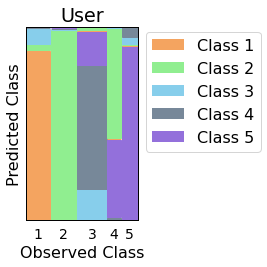

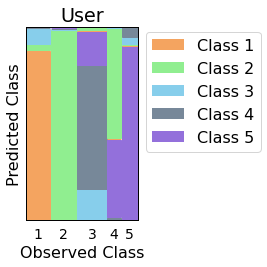

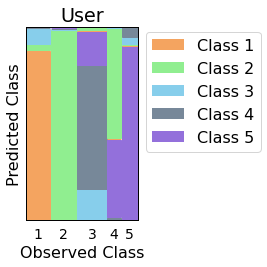

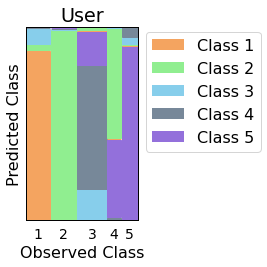

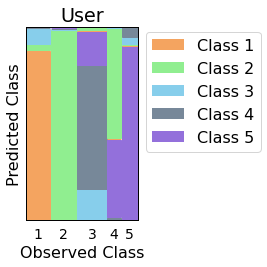

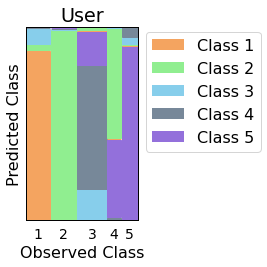

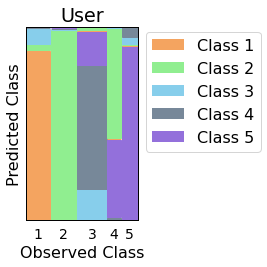

In [141]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [142]:
RFA2 = np.mean(scores1)
RFF2 = np.mean(scores2)
print(RFA2)
print(RFF2)

0.7764201873972095
0.7516417911975273


In [143]:
df3 = df2.drop(['X9','Y9','Z9'], axis=1)

In [144]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3.drop('Class', axis=1)[df3['User'] == i]
    X_train = df3.drop('Class', axis=1)[df3['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3['Class'][df3['User'] == i]
    y_train = df3['Class'][df3['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.840738284703802
The f1 score for the User 0 is: 0.8404804051480902
[[1558   41  273    0    0]
 [   0 1123    0    2  376]
 [   8    6 1771   52   14]
 [  43    0  491 1203   44]
 [   0   29   22   40 1952]]


The accuracy score for the User 1 is: 0.8473606105575577
The f1 score for the User 1 is: 0.8345295337518587
[[1307    0    0    0    0]
 [   0  637    0   22  137]
 [  25    0  834  109    0]
 [   0  174    4  156  227]
 [   0    9    5    8 1063]]


The accuracy score for the User 2 is: 0.7168180810990472
The f1 score for the User 2 is: 0.6630780577334516
[[1196    0    2    0    0]
 [   0  641    0    0  167]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0 1086   12   10    1]]


The accuracy score for the User 5 is: 0.5516160626836435
The f1 score for the User 5 is: 0.4379550455263896
[[   0  498  101    0  221]
 [   0 1113   30    0    0]
 [   0    0  924    2    0]
 [   0    0 1018   15    0]
 [   0  419    0    0  764]]

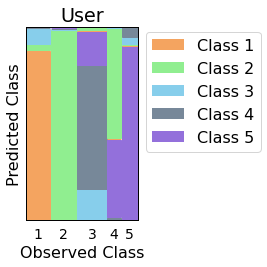

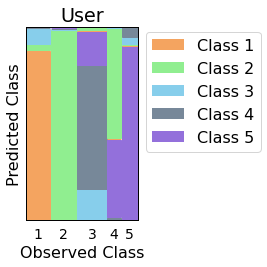

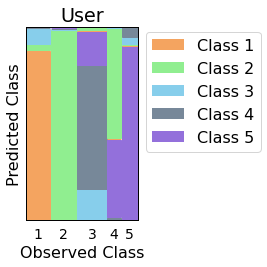

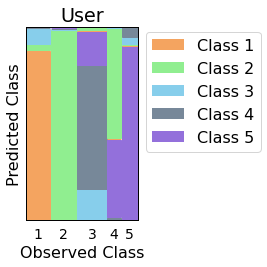

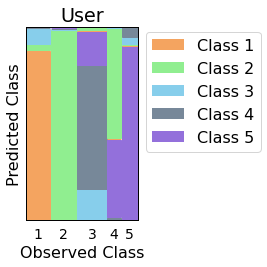

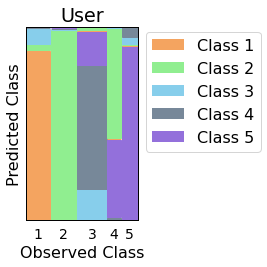

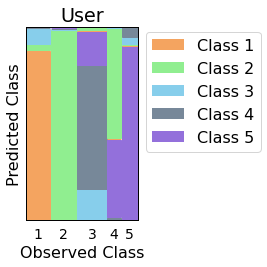

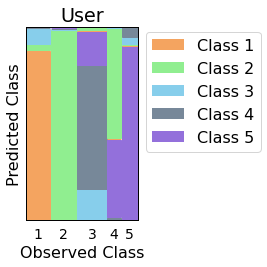

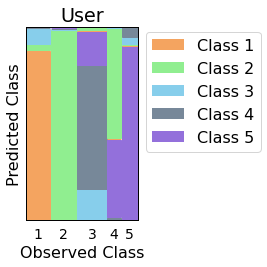

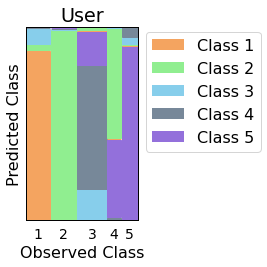

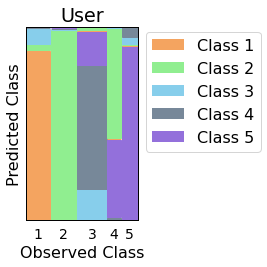

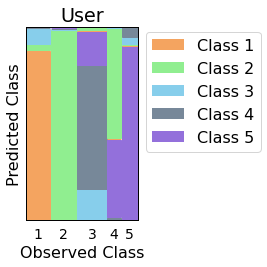

In [145]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [146]:
RFA3 = np.mean(scores1)
RFF3 = np.mean(scores2)
print(RFA3)
print(RFF3)

0.775330860105484
0.7474872451048267


#### There is not much significant improvement in df4 so we will proceed with df3 as we do not want to lose a lot of data.

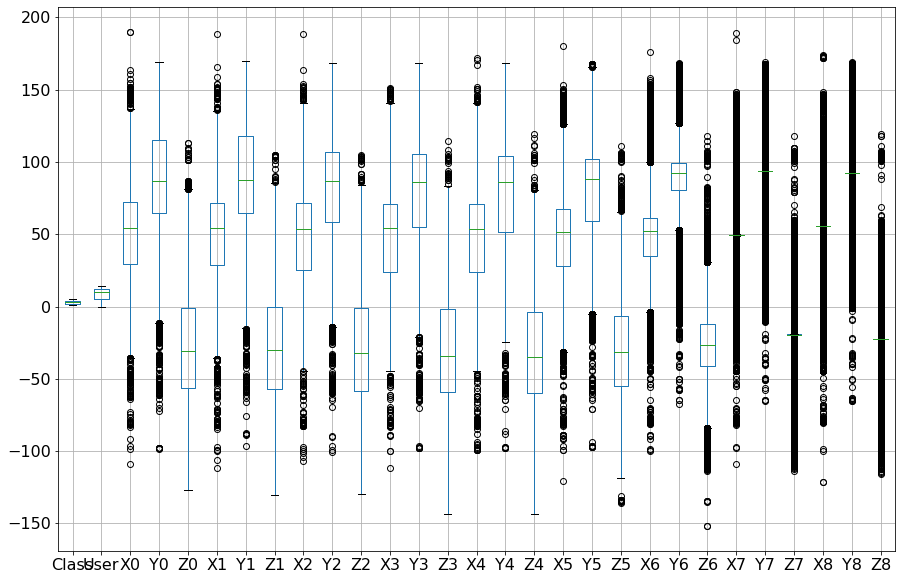

In [147]:
df3.boxplot(figsize=(15,10))
plt.show()

In [148]:
df3c = df3.copy()

df3c1 = df3c[df3c['Class']==1]
df3c2 = df3c[df3c['Class']==2]
df3c3 = df3c[df3c['Class']==3]
df3c4 = df3c[df3c['Class']==4]
df3c5 = df3c[df3c['Class']==5]

L = [df3c1, df3c2, df3c3, df3c4, df3c5]

In [149]:
for j in L:
    for i in (j.drop(['Class','User'], axis=1).columns):
        Q1 = j[i].quantile(0.25)
        Q3 = j[i].quantile(0.75)
        IQR = Q3 - Q1

        j[i][j[i]>(Q3+1.5*IQR)] = Q3
        j[i][j[i]<(Q1-1.5*IQR)] = Q1
        
df3c = pd.concat(L)

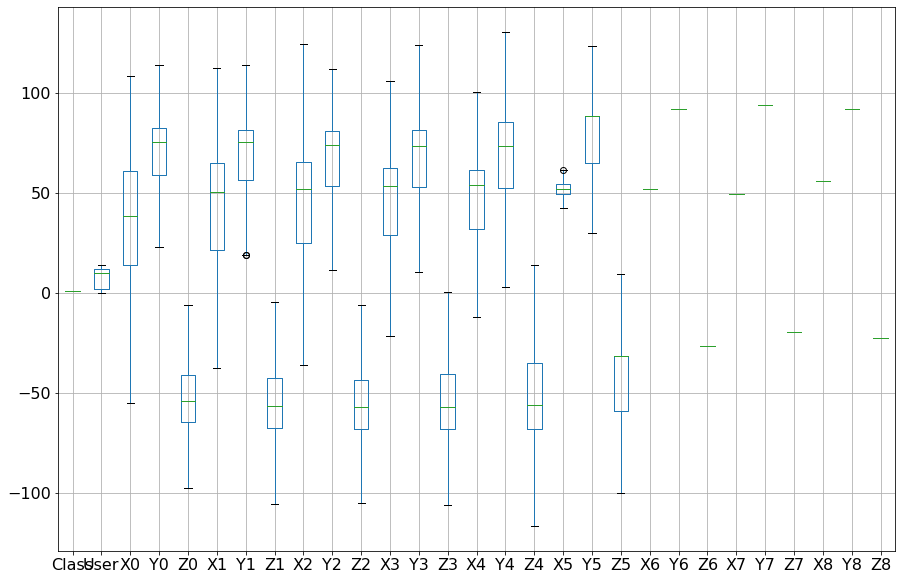

In [150]:
df3c1.boxplot(figsize=(15,10))
plt.show()

In [151]:
df3c = df3c.sample(frac = 1)

In [152]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8796419098143236
The f1 score for the User 0 is: 0.8792796139625589
[[1592  111  169    0    0]
 [   0 1308    0    0  193]
 [  44    0 1807    0    0]
 [  41    0  459 1273    8]
 [   4    6   15   39 1979]]


The accuracy score for the User 1 is: 0.9641721433114268
The f1 score for the User 1 is: 0.9631822968197727
[[1307    0    0    0    0]
 [   0  645   12   29  110]
 [   0    0  968    0    0]
 [   0    0    0  561    0]
 [   0   15    0    3 1067]]


The accuracy score for the User 2 is: 0.8041214269886993
The f1 score for the User 2 is: 0.7796424794966234
[[1193    0    5    0    0]
 [   0  780    0    0   28]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  850    0    0  259]]


The accuracy score for the User 5 is: 0.9034280117531831
The f1 score for the User 5 is: 0.9017321287776956
[[ 636    0  171   13    0]
 [   0 1135    0    2    6]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  301    0    0  882]

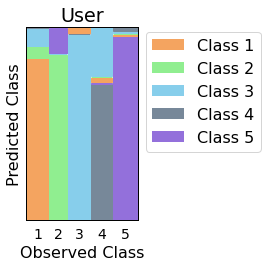

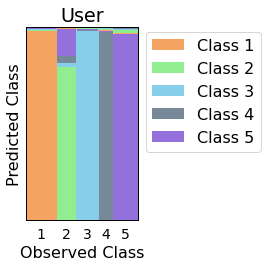

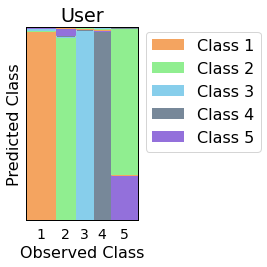

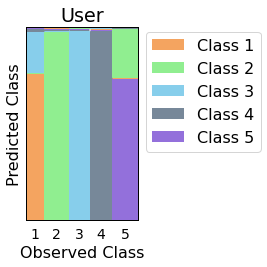

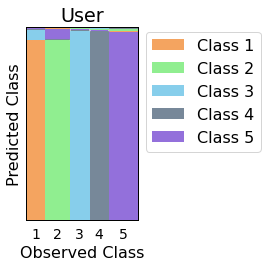

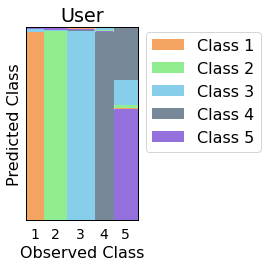

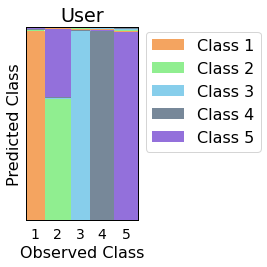

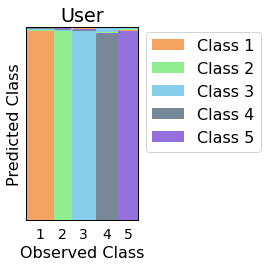

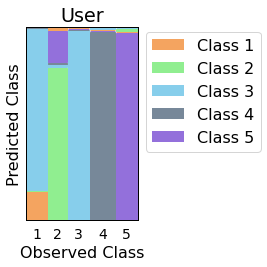

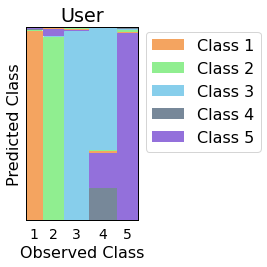

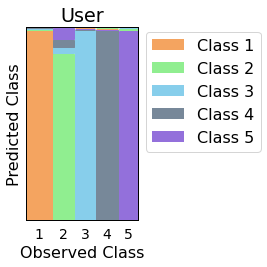

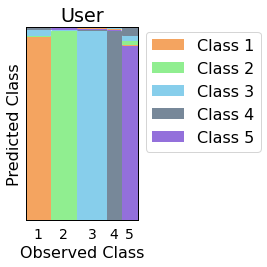

In [153]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [154]:
RFAc = np.mean(scores1)
RFFc = np.mean(scores2)
print(RFAc)
print(RFFc)

0.9068412627483388
0.8965474996162649


#### Clearly a few users are performing very poorly in some cases. We can try dealing with a few users specially in the class they are performing poorly.

### Applying Gradient Boost

In [155]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    xgb = GradientBoostingClassifier()
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8796419098143236
The f1 score for the User 0 is: 0.874334054877561
[[1872    0    0    0    0]
 [   0 1415    0    0   86]
 [  98    0 1753    0    0]
 [ 589    0   70 1011  111]
 [   8   71   10   46 1908]]


The accuracy score for the User 1 is: 0.9317362730549078
The f1 score for the User 1 is: 0.9314477929537219
[[1307    0    0    0    0]
 [   0  641    0   42  113]
 [   2    0  936   30    0]
 [   0    0    0  561    0]
 [   0  129    0    6  950]]


The accuracy score for the User 2 is: 0.776202082871704
The f1 score for the User 2 is: 0.7347935691496957
[[1198    0    0    0    0]
 [   0  782    0    0   26]
 [  11    0  710    0    0]
 [   0    0    1  676    0]
 [   0  972    0    0  137]]


The accuracy score for the User 5 is: 0.8965719882468168
The f1 score for the User 5 is: 0.893282677515305
[[ 748    0   52    0   20]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  456    0    0  727]]



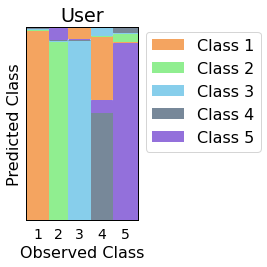

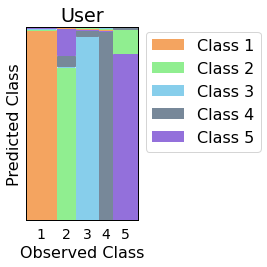

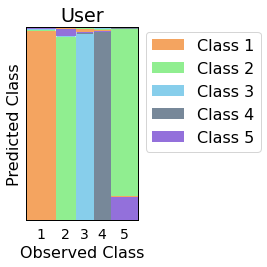

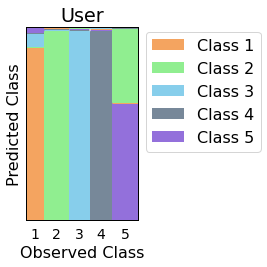

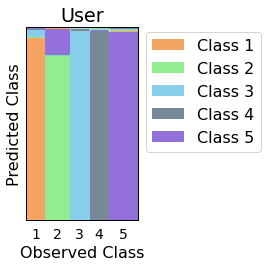

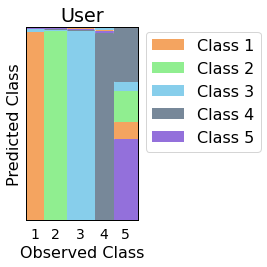

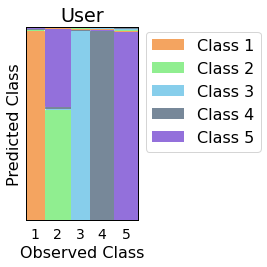

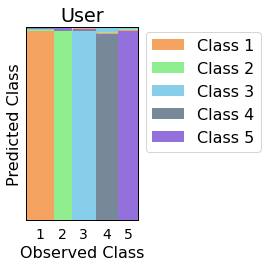

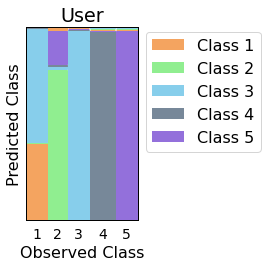

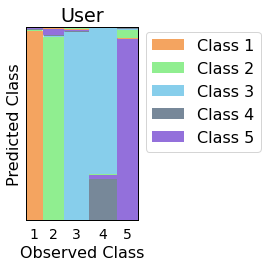

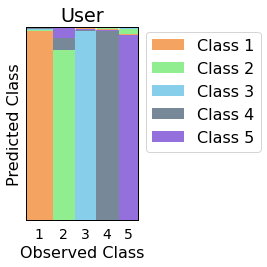

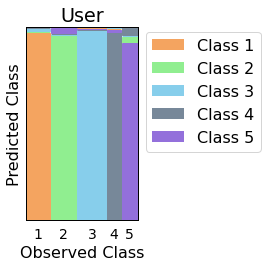

In [156]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [157]:
GBA = np.mean(scores1)
GBF = np.mean(scores2)
print(GBA)
print(GBF)

0.9004362407261448
0.8905339895238898


### Applying XGBoost:

In [158]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8746684350132626
The f1 score for the User 0 is: 0.8727874018596986
[[1871    0    1    0    0]
 [   0 1347    0    0  154]
 [ 249    0 1602    0    0]
 [ 206    0  179 1263  133]
 [   8  147    8   49 1831]]


The accuracy score for the User 1 is: 0.9321602713589145
The f1 score for the User 1 is: 0.9314474236366383
[[1307    0    0    0    0]
 [   0  632    0   42  122]
 [  21    0  945    2    0]
 [   0    0    0  561    0]
 [   0  120    0   13  952]]


The accuracy score for the User 2 is: 0.7717704409483713
The f1 score for the User 2 is: 0.7233113563105804
[[1198    0    0    0    0]
 [   0  788    0    0   20]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0 1009    0    0  100]]


The accuracy score for the User 5 is: 0.879333986287953
The f1 score for the User 5 is: 0.8760550876223504
[[ 626    0  194    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  422    0    0  761]]

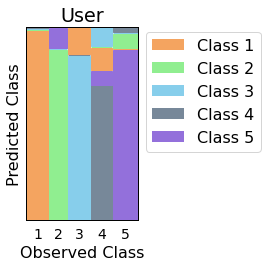

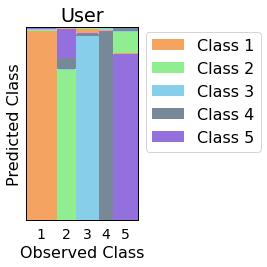

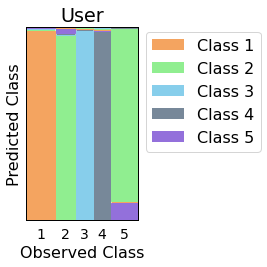

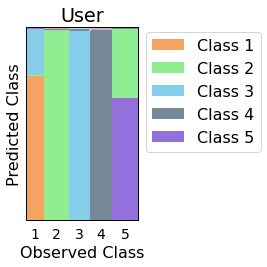

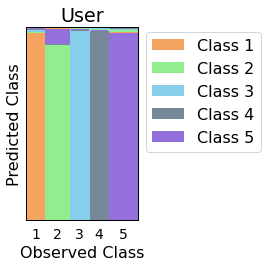

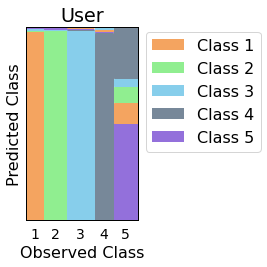

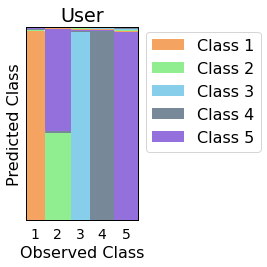

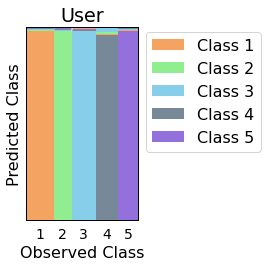

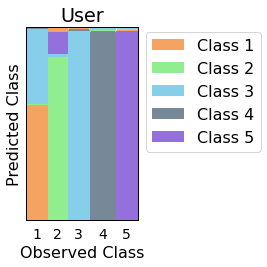

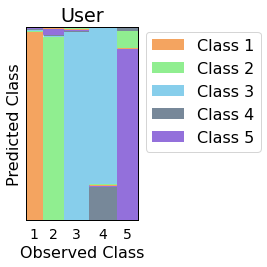

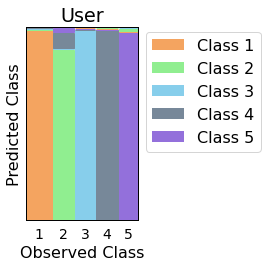

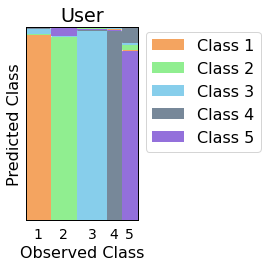

In [159]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [160]:
XGA = np.mean(scores1)
XGF = np.mean(scores2)
print(XGA)
print(XGF)

0.9007505272116042
0.8908728002742919


### Support Vector Machines

In [161]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    sv.fit(X_train, y_train)
    
    y_pred = sv.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8911361626878869
The f1 score for the User 0 is: 0.888002432592585
[[1865    0    7    0    0]
 [   0 1426    0    1   74]
 [  96    0 1755    0    0]
 [ 140   11   17 1158  455]
 [   0  104    0   80 1859]]


The accuracy score for the User 1 is: 0.9105363578545685
The f1 score for the User 1 is: 0.909848808913821
[[1307    0    0    0    0]
 [   0  688    0    0  108]
 [   0   21  947    0    0]
 [   0  180    3  373    5]
 [   0   17    6   82  980]]


The accuracy score for the User 2 is: 0.7724351872368712
The f1 score for the User 2 is: 0.7313997443153908
[[1198    0    0    0    0]
 [   0  761    0    0   47]
 [   0    0  721    0    0]
 [   0    0    0  677    0]
 [   0  979    0    1  129]]


The accuracy score for the User 5 is: 0.9212536728697356
The f1 score for the User 5 is: 0.9183792444578976
[[ 468    0  352    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0   37  996    0]
 [   0   13    0    0 1170]]


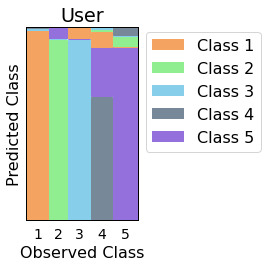

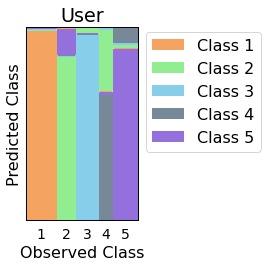

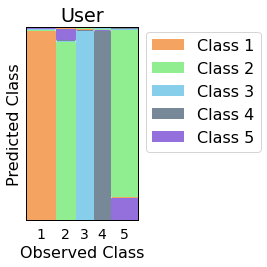

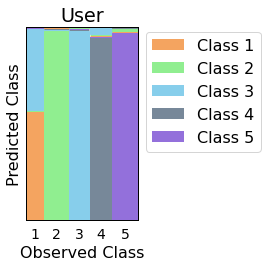

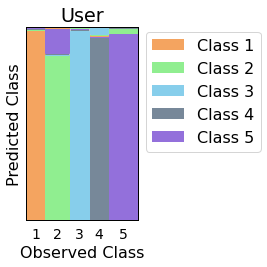

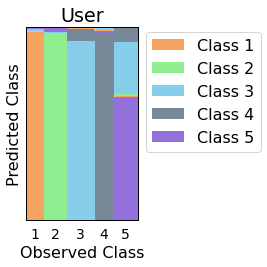

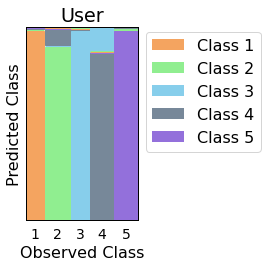

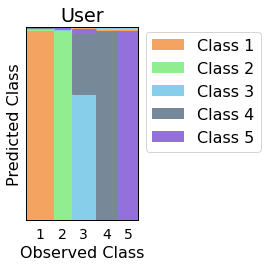

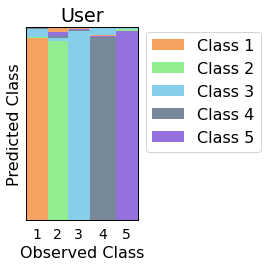

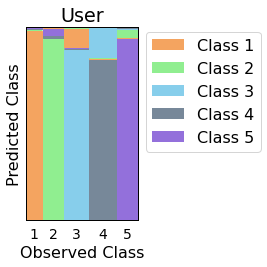

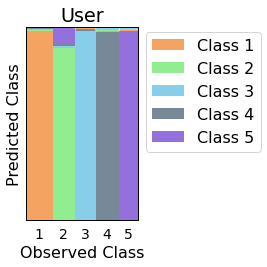

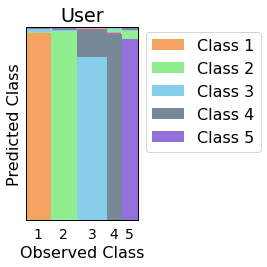

In [162]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [163]:
SVA = np.mean(scores1)
SVF = np.mean(scores2)
print(SVA)
print(SVF)

0.9223502494586254
0.9179842033374551


### Voting Classifier

In [164]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    
    clf = VotingClassifier(estimators=[('XGB', xgb), ('RF', rf), ('SVC', sv)],voting='hard')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.9061671087533156
The f1 score for the User 0 is: 0.9036180735693684
[[1871    0    1    0    0]
 [   0 1376    0    0  125]
 [  60    0 1791    0    0]
 [ 203    0  271 1277   30]
 [   8   94    9   48 1884]]


The accuracy score for the User 1 is: 0.957812168751325
The f1 score for the User 1 is: 0.956966068978968
[[1307    0    0    0    0]
 [   0  647    0   40  109]
 [  15    0  953    0    0]
 [   0    0    0  561    0]
 [   0   29    0    6 1050]]


The accuracy score for the User 2 is: 0.7728783514292045
The f1 score for the User 2 is: 0.7267159335750247
[[1198    0    0    0    0]
 [   0  783    0    0   25]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  999    0    0  110]]


The accuracy score for the User 5 is: 0.90871694417238
The f1 score for the User 5 is: 0.906926207167588
[[ 570    0  250    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  216    0    0  967]]


T

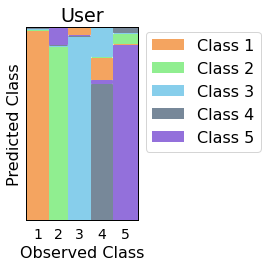

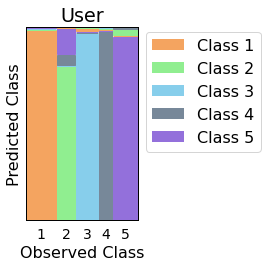

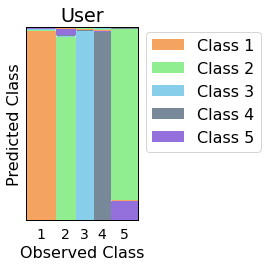

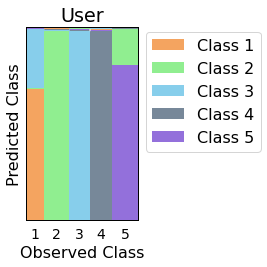

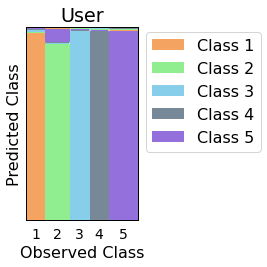

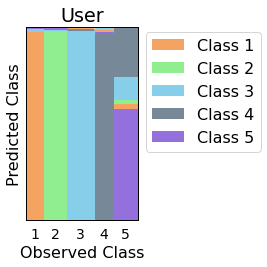

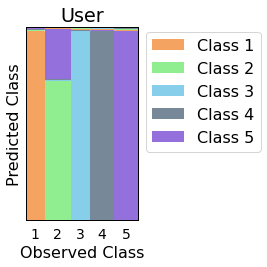

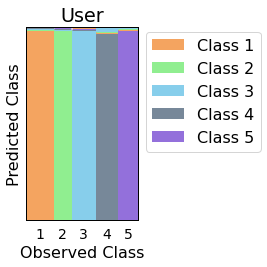

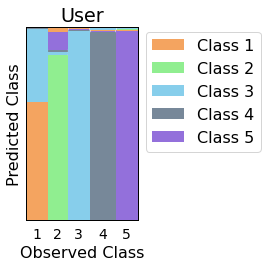

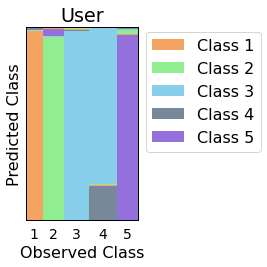

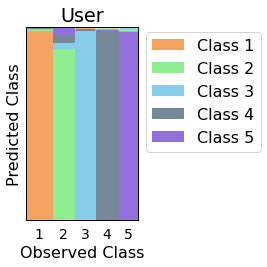

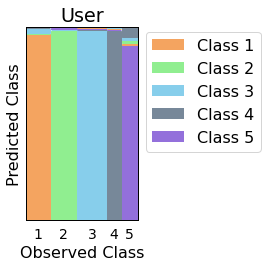

In [165]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [166]:
VCA = np.mean(scores1)
VCF = np.mean(scores2)
print(VCA)
print(VCF)

0.9181582369373101
0.9096190493166564


In [167]:
df5 = df3c.copy()
df5[df5['User']==2] = df5[df5['User']==2][df5['Class']!=5]
df5[df5['User']==12] = df5[df5['User']==12][df5['Class']!=4]
df5 = df5.dropna()

In [168]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df5.drop('Class', axis=1)[df5['User'] == i]
    X_train = df5.drop('Class', axis=1)[df5['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df5['Class'][df5['User'] == i]
    y_train = df5['Class'][df5['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    rf = RandomForestClassifier(random_state=1)
    gb = GradientBoostingClassifier(random_state=1)
    
    clf = VotingClassifier(estimators=[('gb', gb), ('rf', rf), ('svc', sv)],voting='hard')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8969938107869142
The f1 score for the User 0 is: 0.8913335492282278
[[1871    0    1    0    0]
 [   0 1491    0    0   10]
 [  67    0 1784    0    0]
 [ 485    0  132 1061  103]
 [   1   72    7   54 1909]]


The accuracy score for the User 1 is: 0.9357642569429723
The f1 score for the User 1 is: 0.9361044150706145
[[1307    0    0    0    0]
 [   0  673   11    0  112]
 [   0   16  952    0    0]
 [   0    0    0  561    0]
 [   0  162    0    2  921]]


The accuracy score for the User 2 is: 0.9932432432432432
The f1 score for the User 2 is: 0.9964301285630838
[[1198    0    0    0    0]
 [   0  786    0    0   22]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0    0    0    0    0]]


The accuracy score for the User 5 is: 0.8940254652301665
The f1 score for the User 5 is: 0.8917045663769672
[[ 665    0  155    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  386    0    0  797]

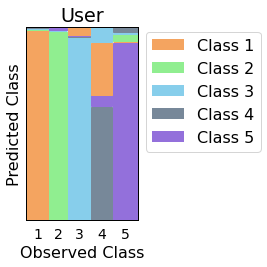

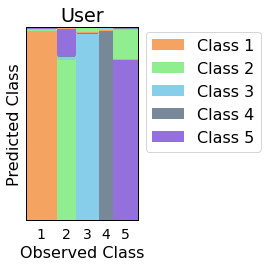

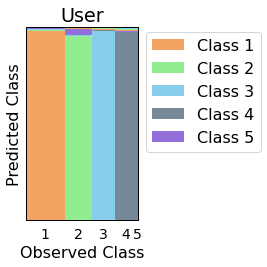

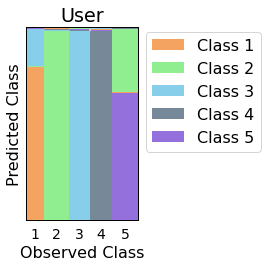

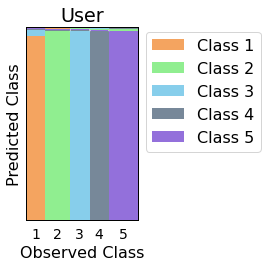

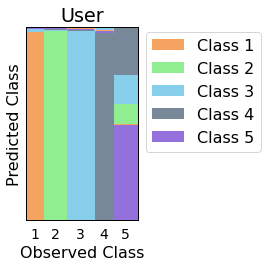

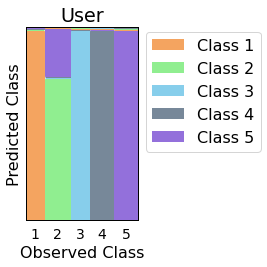

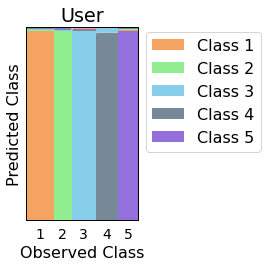

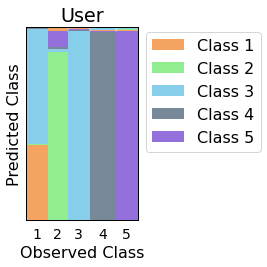

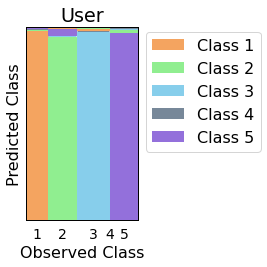

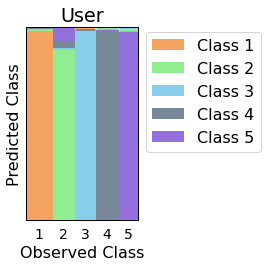

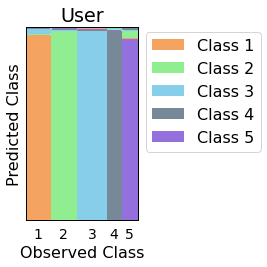

In [169]:
for i in matrix:
    mosaic_plot(i)
plt.show()

In [170]:
VCA2 = np.mean(scores1)
VCF2 = np.mean(scores2)
print(VCA2)
print(VCF2)

0.9460756810232743
0.9436441061513506


In [171]:
df3c.shape, df5.shape

((77224, 29), (74903, 29))

In [172]:
df_final = pd.DataFrame({'Logistic Regression':LRF, 'Random Forest':RFFc, 'Gradient Boost':GBF,
                    'XGBoost':XGF, 'Support Vector Machines':SVF, 'Voting Classifier':VCF2})
df_final

ValueError: If using all scalar values, you must pass an index